In [3]:
from matplotlib import pyplot as plt

def plot_results(Results):
    for dataset_name in Results:
        colors = ['red', 'blue', 'green', 'black']
        results = Results[dataset_name]
        (fig, ax) = plt.subplots(1, 2)
        fig.suptitle(dataset_name)
        for (trial, color) in zip(results, colors):
            ax[0].plot(results[trial]['train_loss'], '--', color=color)
            ax[0].plot(results[trial]['test_loss'], '-', color=color, label=trial)
            ax[1].plot(results[trial]['train_acc'], '--', color=color)
            ax[1].plot(results[trial]['test_acc'], '-', color=color, label=trial)
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Loss')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Accuracy')
        ax[0].legend()
        ax[1].legend()

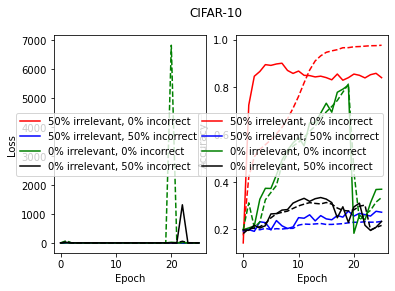

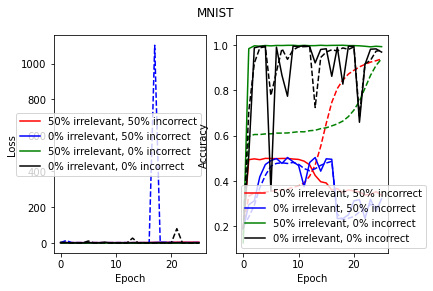

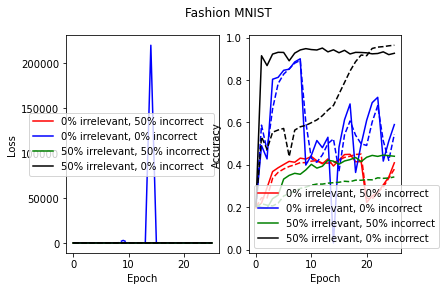

In [4]:
import os
import pickle

Results = {'CIFAR-10': {},
           'MNIST': {},
           'Fashion MNIST': {}}

files = [f for f in os.listdir(os.path.join('.', 'results'))]
for f in files:
    with open(os.path.join('.', 'results', f, 'results.pickle'), 'rb') as F:
        results = pickle.load(F)
    if 'cifar10' in f:
        dataset_name = 'CIFAR-10'
    elif 'mnist' in f and not('fmnist' in f):
        dataset_name = 'MNIST'
    elif 'fmnist' in f:
        dataset_name = 'Fashion MNIST'
    if 'irrelev_0' in f:
        irrelev = 0
    elif 'irrelev_50' in f:
        irrelev = 50
    if 'incorrect_0' in f:
        incorrect = 0
    elif 'incorrect_50' in f:
        incorrect = 50
    Results[dataset_name].update({'%d%% irrelevant, %d%% incorrect'%(irrelev, incorrect): results})

plot_results(Results)